# Data Format
Interferograms are represented as complex value 2D array in this package. The real and imaginary parts of a wrapped interferogram is stored in the _ALT_SAMPLE_FORMAT_  as shown in the figure below.
<img src="data/data_format.png" width=600 height=500 />
Here we are showing how an $m$ by $n$ interferogram is stored as a single-precision floating-point format (**float32**) binary file. $R_{ij}$ and $I_{ij}$ represent the real and imaginary part of the complex value at radar pixel $(i,j)$, respectively. And the interfeorgram is stored in the row-major order (i.e., in the order of row 1, row 2, ..., row m).

Amplitude images are represented as real value 2D array in this package and are also assumed to be stored in the row-major order.

Note that the input images must be stored in the described order for correct PS selection.

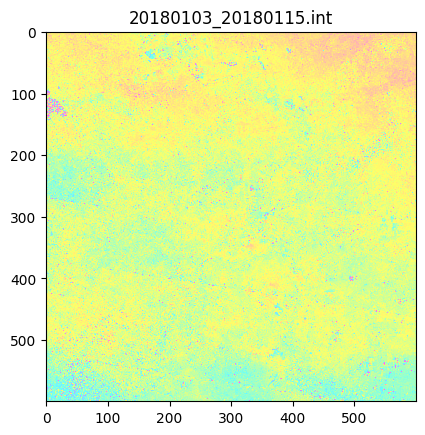

In [5]:
### demo on how to read/save an interferogram
from psps import sario
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['image.interpolation'] = 'none'

ifgfile = 'data/igrams/20180103_20180115.int' # filename
nrow,ncol = 600,600                     # number of rows and columns
ifg = sario.read_ifg(ifgfile,nrow,ncol) # read the interferogram
phase = np.angle(ifg)                   # calculate the InSAR phase

# uncommented next line to save the inteferogram to data/ifg.int
# sario.save_ifg(ifg,'data/ifg.int')

fig,ax = plt.subplots()
ax.imshow(phase,cmap=sario.ifgcmap,vmin=-np.pi,vmax=np.pi)
ax.set_title('20180103_20180115.int')
plt.show()

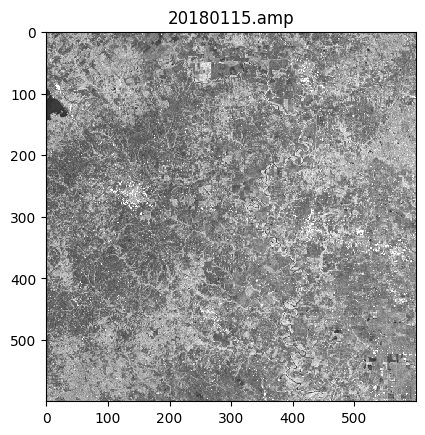

In [7]:
### demo on how to read an amplitude image
ampfile = 'data/amplitude/20180115.amp'  # filename
nrow,ncol = 600,600                     # number of rows and columns
amp = np.fromfile(ampfile,dtype=np.float32).reshape(nrow,ncol)

fig,ax = plt.subplots()
ax.imshow(amp,cmap='gray',vmin=0,vmax=110)
ax.set_title('20180115.amp')
plt.show()